In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
# from sklearn.preprocessing import LabelEncoder
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1 Physical GPUs, 1 Logical GPUs


In [189]:
df.columns

Index(['X', 'Y', 'Q_R_4_0_0', 'Q_R_4_0_1', 'Q_R_4_0_2', 'Q_R_4_0_3',
       'Q_R_4_0_4', 'Q_R_4_0_5', 'Q_R_4_0_6', 'Q_R_4_0_7', 'Q_R_4_0_8',
       'Q_R_4_0_9', 'Q_R_4_1_0', 'Q_G_3_0_0', 'Q_G_3_0_1', 'Q_G_3_0_2',
       'Q_G_3_0_3', 'Q_G_3_0_4', 'Q_G_3_0_5', 'Q_G_3_0_6', 'Q_G_3_0_7',
       'Q_G_3_0_8', 'Q_G_3_0_9', 'Q_G_3_1_0', 'Q_B_2_0_0', 'Q_B_2_0_1',
       'Q_B_2_0_2', 'Q_B_2_0_3', 'Q_B_2_0_4', 'Q_B_2_0_5', 'Q_B_2_0_6',
       'Q_B_2_0_7', 'Q_B_2_0_8', 'Q_B_2_0_9', 'Q_B_2_1_0', 'Q_NIR_8_0_0',
       'Q_NIR_8_0_1', 'Q_NIR_8_0_2', 'Q_NIR_8_0_3', 'Q_NIR_8_0_4',
       'Q_NIR_8_0_5', 'Q_NIR_8_0_6', 'Q_NIR_8_0_7', 'Q_NIR_8_0_8',
       'Q_NIR_8_0_9', 'Q_NIR_8_1_0', 'AREA', 'GEOM_R1', 'GEOM_R2', 'GEOM_R3',
       'GEOM_R4', 'CONTRUCTIONYEAR', 'MAXBUILDINGFLOOR', 'CADASTRALQUALITYID',
       'CLASE'],
      dtype='object')

In [116]:
df = pd.read_csv("hackaton/Modelar_UH2020.txt",sep='|').set_index('ID')
df_ts = pd.read_csv("hackaton/Estimar_UH2020.txt",sep='|').set_index('ID')
df.shape
# df.columns

(103230, 55)

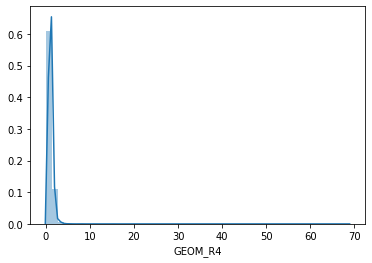

In [103]:
sns.distplot(df.GEOM_R4)

,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4
GEOM_R1,1.000000,0.345744,0.324131,0.031499
GEOM_R2,0.345744,1.000000,0.698488,-0.227333
GEOM_R3,0.324131,0.698488,1.000000,0.356456
GEOM_R4,0.031499,-0.227333,0.356456,1.000000


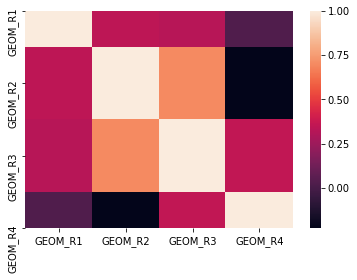

In [111]:
sns.heatmap(df[[c for c in df.columns if "GEOM" in c]].corr()),
df[[c for c in df.columns if "GEOM" in c]].corr()

In [116]:
pca.fit(df[[c for c in df.columns if "GEOM" in c][1:3]].values)
list(accumulate(pca.explained_variance_ratio_))

[0.8492749804811769, 1.0]

In [121]:
df.columns[46:]

Index(['AREA', 'GEOM_R1', 'GEOM_R2', 'GEOM_R3', 'GEOM_R4', 'CONTRUCTIONYEAR',
       'MAXBUILDINGFLOOR', 'CADASTRALQUALITYID', 'CLASE'],
      dtype='object')

In [128]:
df.iloc[:,2:46].values

array([[0.00000000e+00, 4.43001300e+02, 6.16001697e+02, ...,
        2.71999976e+03, 3.18000034e+03, 1.09519266e+04],
       [5.87961113e-05, 4.43899011e+02, 6.27999060e+02, ...,
        2.50700142e+03, 3.01299167e+03, 7.04836764e+03],
       [0.00000000e+00, 3.53502274e+02, 5.23003601e+02, ...,
        2.56199976e+03, 3.08800049e+03, 7.01307327e+03],
       ...,
       [0.00000000e+00, 5.72003784e+02, 7.65000366e+02, ...,
        2.76100049e+03, 3.16200012e+03, 1.48916103e+04],
       [0.00000000e+00, 3.41999185e+02, 5.08998688e+02, ...,
        2.18900410e+03, 2.57099507e+03, 6.71904003e+03],
       [4.84987883e-11, 4.00998581e+02, 5.70003540e+02, ...,
        2.61900244e+03, 3.04000061e+03, 5.97974624e+03]])

In [39]:
Counter(y)

Counter({5: 90173, 1: 4490, 4: 2976, 2: 1828, 3: 1332, 6: 2093, 0: 338})

In [110]:
90173/X.shape[0]

0.8735154509348058

In [96]:
from sklearn.preprocessing import OneHotEncoder


matrix([[1.10897941e-05],
        [1.10897941e-05],
        [1.10897941e-05],
        ...,
        [2.22717149e-04],
        [1.10897941e-05],
        [1.10897941e-05]])

In [95]:
m.A[:10],1/m.sum(0)

(array([[0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0., 0., 0.]]),
 matrix([[2.95857988e-03, 2.22717149e-04, 5.47045952e-04, 7.50750751e-04,
          3.36021505e-04, 1.10897941e-05, 4.77783086e-04]]))

array([5, 5, 5, ..., 1, 5, 5])

In [212]:
le = LabelEncoder()
sc = StandardScaler()
# X = df.iloc[:,2:46].values.reshape((-1,11,4)).astype(np.float32)
# X = sc.fit_transform(X.reshape(-1,4)).reshape(X.shape)

X = sc.fit_transform(
        df.iloc[:,2:46].values.reshape(-1,4,11)
        .transpose((0,2,1))
        .reshape(-1,4))\
    .reshape(-1,11,4).astype(np.float32)
m = OneHotEncoder().fit_transform(y.reshape(-1,1))
y = le.fit_transform(df.CLASE.values)
sample_weights = (m*(1/m.sum(0)).T).A

model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(16,7),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Conv1D(16,5),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(32,use_bias=True),
    tf.keras.layers.LeakyReLU(),
    tf.keras.layers.Dense(np.unique(y).size,use_bias=True),
    tf.keras.layers.Softmax()
])
# X.shape,model(X).shape,
model.compile('adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])

sp = StratifiedShuffleSplit(1,test_size=0.2)
tr_idx,ts_idx = list(sp.split(X,y))[0]
cw = 1/m.A.sum(0)
cw = (cw/(cw.sum()))+0.3
# cw = minmaxsc(y.size - m.A.sum(0))
h = model.fit(X[tr_idx],y[tr_idx],validation_data=(X[ts_idx],y[ts_idx]),batch_size=32,epochs=10)#,class_weight=dict(zip(np.arange(7),cw)))

Train on 82584 samples, validate on 20646 samples
Epoch 1/10
82584/82584 [==============================] - 18s 218us/sample - loss: 0.5658 - accuracy: 0.8732 - val_loss: 0.5485 - val_accuracy: 0.8682
Epoch 2/10
82584/82584 [==============================] - 18s 224us/sample - loss: 0.5386 - accuracy: 0.8750 - val_loss: 0.5367 - val_accuracy: 0.8733
Epoch 3/10
82584/82584 [==============================] - 20s 246us/sample - loss: 0.5330 - accuracy: 0.8756 - val_loss: 0.5311 - val_accuracy: 0.8775
Epoch 4/10
82584/82584 [==============================] - 20s 237us/sample - loss: 0.5293 - accuracy: 0.8771 - val_loss: 0.5291 - val_accuracy: 0.8775
Epoch 5/10
82584/82584 [==============================] - 19s 232us/sample - loss: 0.5247 - accuracy: 0.8785 - val_loss: 0.5258 - val_accuracy: 0.8783
Epoch 6/10
82584/82584 [==============================] - 20s 242us/sample - loss: 0.5218 - accuracy: 0.8796 - val_loss: 0.5279 - val_accuracy: 0.8811
Epoch 7/10
82584/82584 [====================

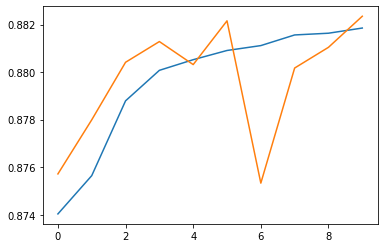

In [209]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
# dict(zip(np.arange(7),))

In [275]:
def minmaxsc(v):
    return v/v.sum()
minmaxsc(y.size - m.A.sum(0))

array([0.16612096, 0.15941748, 0.16371533, 0.16451613, 0.16186186,
       0.02108076, 0.16328748])

In [272]:
m.A.sum(0)

array([  338.,  4490.,  1828.,  1332.,  2976., 90173.,  2093.])

In [139]:
le.inverse_transform(np.arange(7))

array(['AGRICULTURE', 'INDUSTRIAL', 'OFFICE', 'OTHER', 'PUBLIC',
       'RESIDENTIAL', 'RETAIL'], dtype=object)

In [281]:
yp = np.argmax(model.predict(X[ts_idx]),1)
cm = confusion_matrix(y[ts_idx],yp)
cm,cm.sum(0),cm.sum(1)

(array([[   11,     6,     0,     0,     0,    51,     0],
        [    7,   187,     0,     0,     0,   704,     0],
        [    3,    14,     0,     0,     0,   348,     0],
        [    0,     2,     0,     0,     0,   264,     0],
        [    3,     6,     0,     0,     0,   586,     0],
        [    1,   161,     0,     0,     0, 17873,     0],
        [    0,     8,     0,     0,     0,   411,     0]]),
 array([   25,   384,     0,     0,     0, 20237,     0]),
 array([   68,   898,   365,   266,   595, 18035,   419]))

In [123]:
Counter(y[ts_idx])

Counter({5: 18035, 1: 898, 3: 266, 4: 595, 2: 365, 6: 419, 0: 68})

In [284]:
from 
df[['X','Y']]

,X,Y
ID,,
35984B9C3E7CD9A1,2207357872,165920300
F9D04BF6D037F8FB,2189757160,165463267
B89D5711AFF8C423,2240147335,165690752
1C3478AC1522E7E4,2227146459,165934099
4D12AA5009064345,2212350459,165681791
...,...,...
C5FD596EB22DB167,2225843339,165482267
A51D42F2EAB0E15E,2196745557,165159412
9B75473FE6396523,2261090490,165673813


In [96]:
df.describe()

,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,...,Q_NIR_8_0_9,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CLASE
count,1.032300e+05,1.032300e+05,1.032300e+05,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,...,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103230.000000,103210.000000,103230.000000
mean,2.208858e+09,1.655955e+08,4.578804e-05,382.633602,548.659095,684.016575,811.053925,939.978002,1080.127592,1242.841586,...,2738.622278,7748.293927,441.123610,0.563343,0.062482,0.061855,1.074327,1972.552436,3.766709,4.722164
std,2.751723e+07,2.040199e+05,3.168761e-03,99.470870,121.439858,137.763573,153.486424,169.546408,186.422410,206.993926,...,365.812714,2795.775635,1869.705189,0.174141,0.042849,0.042295,0.541156,22.335987,2.944896,0.980145
min,2.120751e+09,1.650957e+08,0.000000e+00,151.000375,184.999420,214.000473,239.999503,269.999451,310.999493,382.999844,...,2172.992676,4085.049076,0.038770,0.000626,0.000679,0.000770,0.015157,1820.000000,0.000000,0.000000
25%,2.194235e+09,1.654515e+08,0.000000e+00,316.997635,492.003845,632.999634,753.999597,875.008087,1006.997498,1173.999329,...,2478.998193,6051.309064,97.477454,0.455183,0.038255,0.038153,0.801352,1960.000000,1.000000,5.000000
50%,2.205985e+09,1.655907e+08,0.000000e+00,385.000995,562.997583,698.003998,833.996582,969.999817,1115.001489,1268.997705,...,2688.000000,6798.207198,171.554907,0.536336,0.055802,0.055036,0.997175,1972.000000,4.000000,5.000000
75%,2.224105e+09,1.657138e+08,5.786675e-07,445.002853,627.001038,770.001611,904.999988,1042.505188,1200.006226,1348.996033,...,2940.996704,8033.479864,343.563671,0.674723,0.078477,0.078064,1.223456,1989.000000,5.000000,5.000000
max,2.287300e+09,1.665046e+08,1.016050e+00,833.999402,1016.000732,1200.003003,1377.999927,1570.504517,1806.002686,2175.694824,...,4614.998535,15848.608811,238058.952253,1.000000,1.785714,2.631579,68.812431,2017.000000,25.000000,6.000000


In [303]:
Counter(df.CADASTRALQUALITYID)

Counter({'2': 2980,
         '8': 5547,
         '5': 19473,
         '6': 24528,
         '4': 24621,
         '7': 13799,
         '3': 10209,
         'C': 216,
         '1': 652,
         '9': 1105,
         'B': 43,
         'A': 37,
         nan: 20})

([<matplotlib.axis.XTick at 0x7fa2b44a9810>,
 <a list of 7 Text xticklabel objects>)

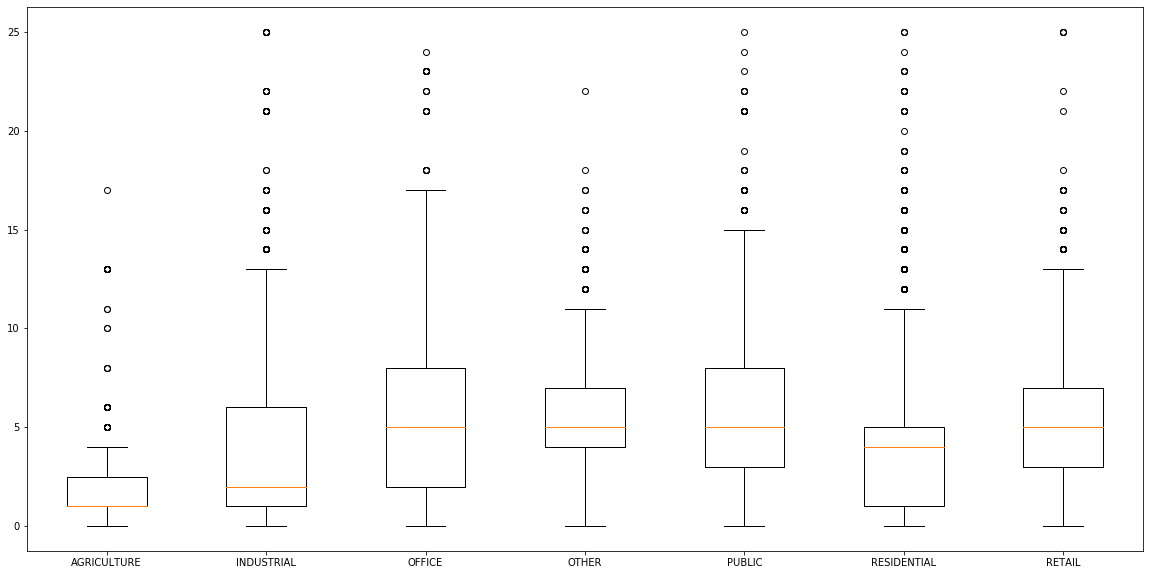

In [326]:
plt.figure(figsize=(20,10))
# for i in range(7):
#     msk = y == i
#     plt.hist(np.log(df.AREA[msk]),density=True,alpha=0.2)
#     sns.distplot((df.MAXBUILDINGFLOOR[msk].dropna()))
plt.boxplot([(df.MAXBUILDINGFLOOR[y == i].dropna()) for i in range(7)])
# plt.legend(le.inverse_transform(np.arange(7)))
plt.xticks(np.arange(1,8),le.inverse_transform(np.arange(7)))
#     plt.xscale('log')

{'whiskers': [<matplotlib.lines.Line2D at 0x7fa2b72b5a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fa2b72a6490>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fa2b7290d50>],
 'medians': [<matplotlib.lines.Line2D at 0x7fa2b72a6ed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fa2b7290d90>],
 'means': []}

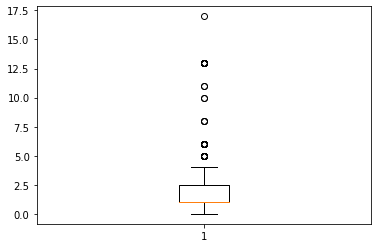

In [321]:
plt.boxplot(df.MAXBUILDINGFLOOR[(y == 0)].dropna())

In [61]:
Counter(df.CLASE)

Counter({'RESIDENTIAL': 90173,
         'INDUSTRIAL': 4490,
         'PUBLIC': 2976,
         'OFFICE': 1828,
         'OTHER': 1332,
         'RETAIL': 2093,
         'AGRICULTURE': 338})

In [94]:
90173/103230

0.8735154509348058

In [82]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(df[[x for x in df.columns if "Q_R" in x]].values)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [84]:
from itertools import accumulate
list(accumulate(pca.explained_variance_ratio_))

[0.969811269654109,
 0.9976894579568962,
 0.9995127018661112,
 0.9999052680353848,
 0.9999732662114345,
 0.999993801815235,
 0.9999975827089013,
 0.9999990662886631,
 0.9999997790735636,
 0.9999999999989492,
 0.9999999999999999]

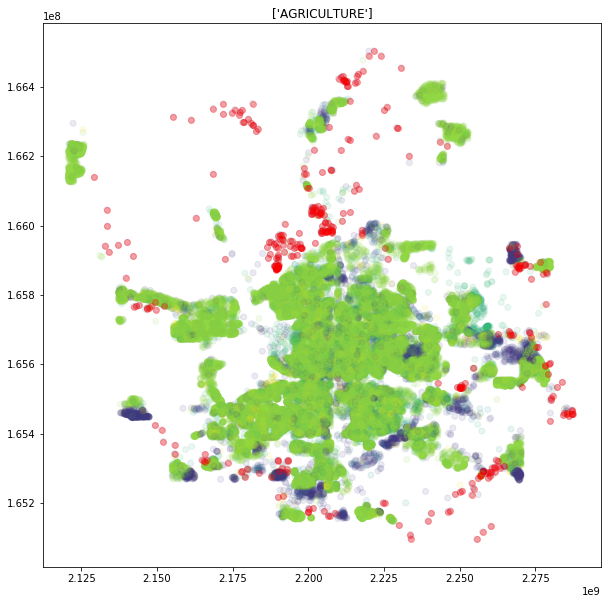

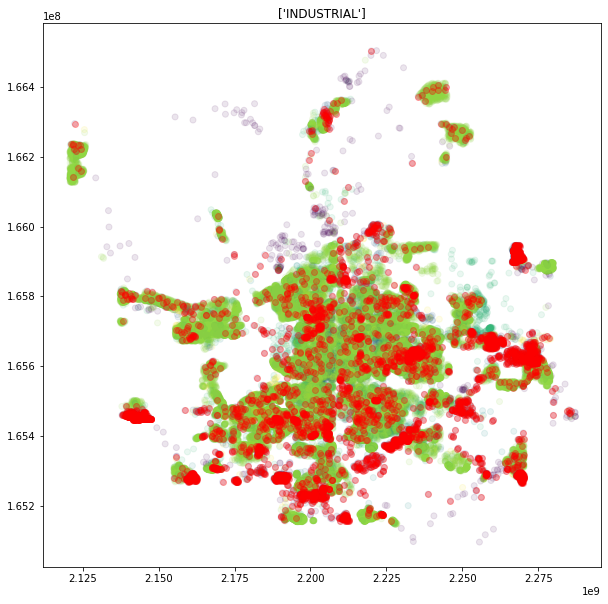

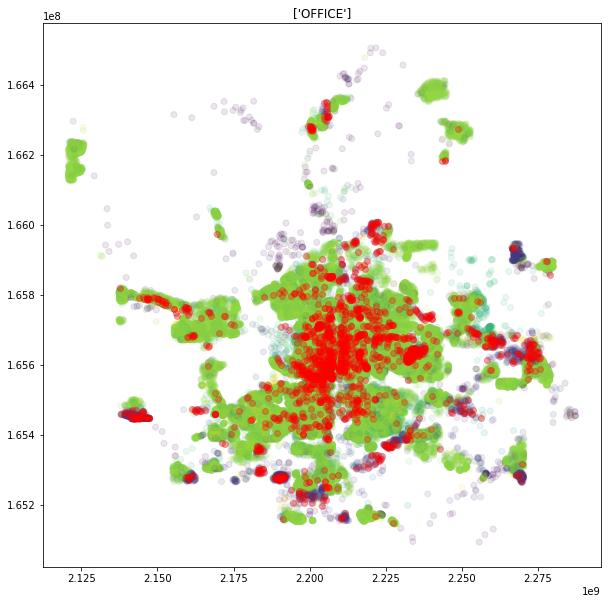

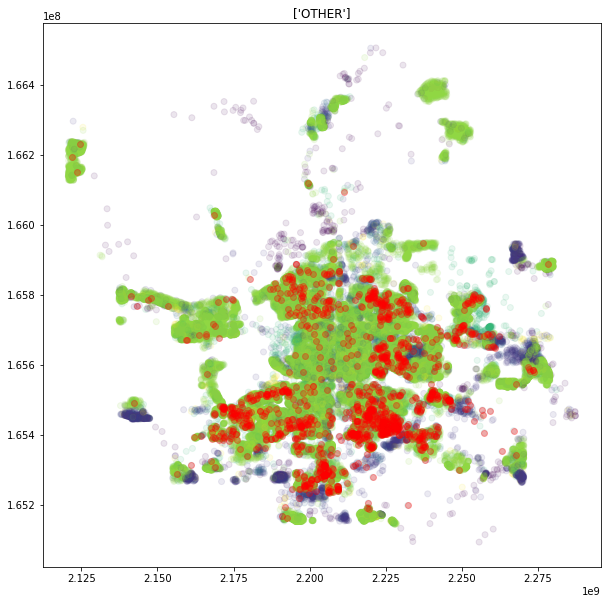

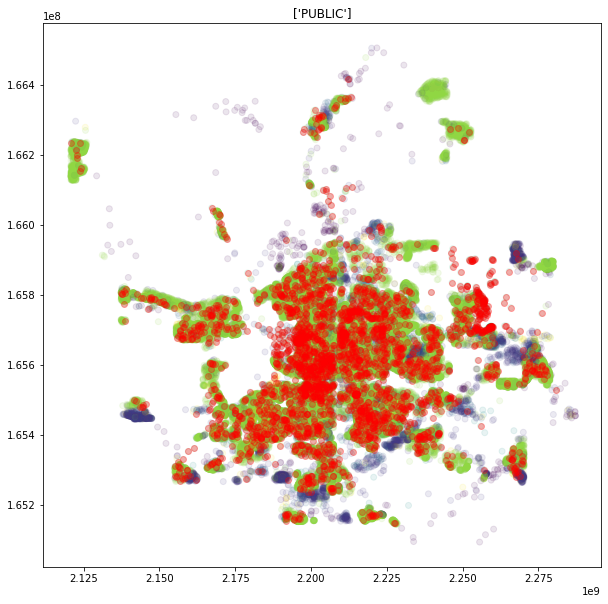

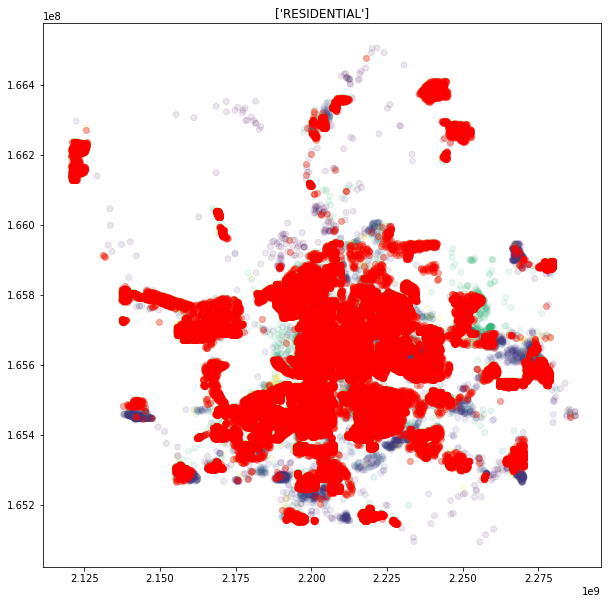

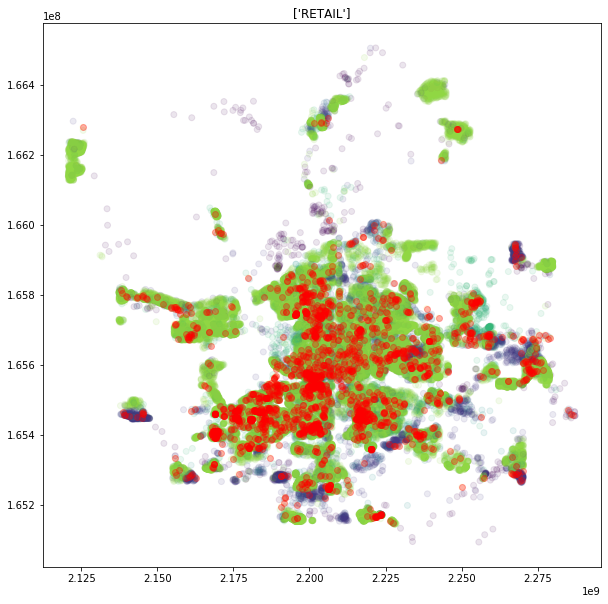

In [150]:
for i in range(7):
    plt.figure(figsize=(10,10))
    # plt.axes().set_aspect('equal')
#     i = 0
    msk = df.CLASE == i
    plt.scatter(df.X,df.Y,c=LabelEncoder().fit_transform(df.CLASE),alpha=0.1)
    plt.scatter(df.X[msk],df.Y[msk],c='red',alpha=0.3)
    plt.title(le.inverse_transform([i]))
    # plt.scatter(df_ts.X,df_ts.Y,c="red",alpha=0.2)


In [129]:
df

,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,...,Q_NIR_8_1_0,AREA,GEOM_R1,GEOM_R2,GEOM_R3,GEOM_R4,CONTRUCTIONYEAR,MAXBUILDINGFLOOR,CADASTRALQUALITYID,CLASE
ID,,,,,,,,,,,,,,,,,,,,,
35984B9C3E7CD9A1,2207357872,165920300,0.000000e+00,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,1342.002466,...,10951.926645,144.426900,0.557237,0.067249,0.057372,0.853127,2002,0.0,2,RESIDENTIAL
F9D04BF6D037F8FB,2189757160,165463267,5.879611e-05,443.899011,627.999060,770.001611,904.999988,1032.998474,1165.001636,1316.000110,...,7048.367637,38.342550,0.709884,0.125156,0.147929,1.181953,1949,1.0,8,RESIDENTIAL
B89D5711AFF8C423,2240147335,165690752,0.000000e+00,353.502274,523.003601,644.001831,760.997131,876.999634,1006.997498,1168.995544,...,7013.073271,108.794384,0.517702,0.058268,0.081666,1.401552,1986,1.0,5,RESIDENTIAL
1C3478AC1522E7E4,2227146459,165934099,0.000000e+00,268.000613,376.999609,478.003784,575.001233,683.997742,809.005994,955.002960,...,6216.880538,155.224455,0.450871,0.053591,0.054201,1.011382,1999,1.0,2,RESIDENTIAL
4D12AA5009064345,2212350459,165681791,0.000000e+00,318.997910,492.003845,632.999634,757.002197,882.999908,1019.008911,1175.993103,...,7092.767616,1789.873366,0.458819,0.012858,0.019936,1.550478,1966,8.0,6,RESIDENTIAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C5FD596EB22DB167,2225843339,165482267,2.183254e-11,427.999246,604.004626,742.996454,866.005859,990.999512,1124.001465,1268.997705,...,7697.199141,118.691883,0.431234,0.058275,0.062346,1.069859,1970,5.0,6,RESIDENTIAL
A51D42F2EAB0E15E,2196745557,165159412,1.108565e-06,544.002496,690.999658,812.997748,933.008777,1055.998779,1187.997485,1340.002747,...,5657.631409,62.673700,0.469740,0.090090,0.083195,0.923461,1994,1.0,4,RESIDENTIAL
9B75473FE6396523,2261090490,165673813,0.000000e+00,572.003784,765.000366,924.996460,1097.998169,1329.000732,1609.997925,1974.998596,...,14891.610338,303.685474,0.938707,0.035331,0.087489,2.476290,1945,1.0,9,INDUSTRIAL


In [195]:
qle = LabelEncoder()
le_c, le_q = LabelEncoder().fit_transform(df.CLASE),qle.fit_transform(df.CADASTRALQUALITYID.astype('str'))
m = np.zeros((np.unique(le_c).size,np.unique(le_q).size))
m += 1e-10
for i,j in zip(le_c,le_q):
    m[i,j] += 1

([<matplotlib.axis.XTick at 0x7fbd3d6a3dd0>,
 <a list of 13 Text xticklabel objects>)

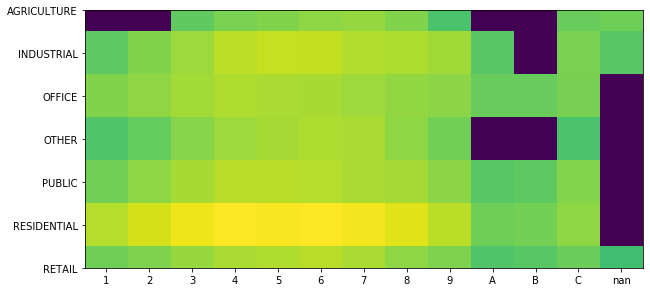

In [196]:
plt.figure(figsize=(10,10))
plt.imshow(np.log(m))
plt.yticks(range(7),le.inverse_transform(range(7)))
plt.xticks(range(13),qle.inverse_transform(range(13)))

In [197]:
Counter(df.CADASTRALQUALITYID)

Counter({'2': 2980,
         '8': 5547,
         '5': 19473,
         '6': 24528,
         '4': 24621,
         '7': 13799,
         '3': 10209,
         'C': 216,
         '1': 652,
         '9': 1105,
         'B': 43,
         'A': 37,
         nan: 20})

In [199]:
20/100000

0.0002

array(['AGRICULTURE', 'INDUSTRIAL', 'OFFICE', 'OTHER', 'PUBLIC',
       'RESIDENTIAL', 'RETAIL'], dtype=object)

In [91]:
Counter(df.CADASTRALQUALITYID)

Counter({'2': 2980,
         '8': 5547,
         '5': 19473,
         '6': 24528,
         '4': 24621,
         '7': 13799,
         '3': 10209,
         'C': 216,
         '1': 652,
         '9': 1105,
         'B': 43,
         'A': 37,
         nan: 20})

In [33]:
from sklearn.base import BaseEstimator
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import accuracy_score

class MaskKNNEval():
    def __init__(self,*args,**kwargs):
        self.nn = NearestNeighbors(*args,**kwargs)
        
    def _rowbincount(self,x,dsts,N=7):
        return (np.bincount(x.ravel() + np.arange(x.shape[0]).repeat(x.shape[1])*N,weights=1/(dsts+1e-20),minlength=x.shape[0]*N)).reshape((-1,N))
    
    def fit_predict(self,X,y,rmsk=None,cmsk=None):
        rmsk = rmsk if rmsk is not None else np.ones(X.shape[0],dtype=np.bool)
        cmsk = cmsk if cmsk is not None else np.ones(X.shape[1],dtype=np.bool)
        KNN_SIZE = self.nn.n_neighbors
        
        self.nn.fit(X[rmsk][:,cmsk])
        ypred = self.nn.kneighbors(X[:,cmsk],KNN_SIZE+1)

        ridxs = np.arange(y.shape[0]).repeat(KNN_SIZE)
        vis = rmsk.astype(np.int)
        cidxs = (vis.repeat(KNN_SIZE).reshape(-1,KNN_SIZE)+np.arange(KNN_SIZE)).ravel()

        dsts = ypred[0][ridxs,cidxs]
        eidxs = np.where(rmsk)[0][ypred[1][ridxs,cidxs]]
#         return ypred, dsts, eidxs
#         return self._rowbincount(y[eidxs].reshape(y.shape[0],-1),dsts).argmax(1)
        return self._rowbincount(y[eidxs].reshape(-1,KNN_SIZE),dsts).argmax(1)
    
    def fit_acc(self,X,y,*args,**kwargs):
        return accuracy_score(y,self.fit_predict(X,y,*args,**kwargs))

In [200]:

rmsk.sum()

13037

In [206]:
# cmsk  =[True if x in df.iloc[:,2:46].columns else False for x in mini_df.columns]
cmsk  =[True if x in ['X','Y'] else False for x in mini_df.columns]
cmsk = None
rmsk = y != 5
rmsk = None
tr_idx, ts_idx = list(sp.split(X,y))[0]
knn = MaskKNNEval(15,n_jobs=-1, p=1)
yb = y == 5
yp = knn.fit_predict(X,yb,cmsk=cmsk,rmsk=rmsk)
# accuracy_score(y,yp)

In [213]:
confusion_matrix(yb,yp),f1_score(yb,yp,average='macro')

(array([[ 5918,  7119],
        [  750, 89423]]), 0.7792576431453733)

In [207]:
# confusion_matrix(y[rmsk],yp[rmsk]),confusion_matrix(y[rmsk],yp[rmsk]).sum(0),confusion_matrix(y[rmsk],yp[rmsk]).sum(1)
confusion_matrix(yb,yp[rmsk]),confusion_matrix(yb,yp[rmsk]).sum(0),confusion_matrix(yb,yp[rmsk]).sum(1)

ValueError: Found input variables with inconsistent numbers of samples: [103210, 1]

In [99]:
plt_msk.shape,X.shape,df.shape,np.where(~(df.isna().any(1)))[0][rmsk]

((103210,),
 (103210, 53),
 (103230, 55),
 array([    12,     37,     48, ..., 103171, 103182, 103204]))

In [149]:
df.X[scatter_msk]

IndexError: Boolean index has wrong length: 103210 instead of 103230

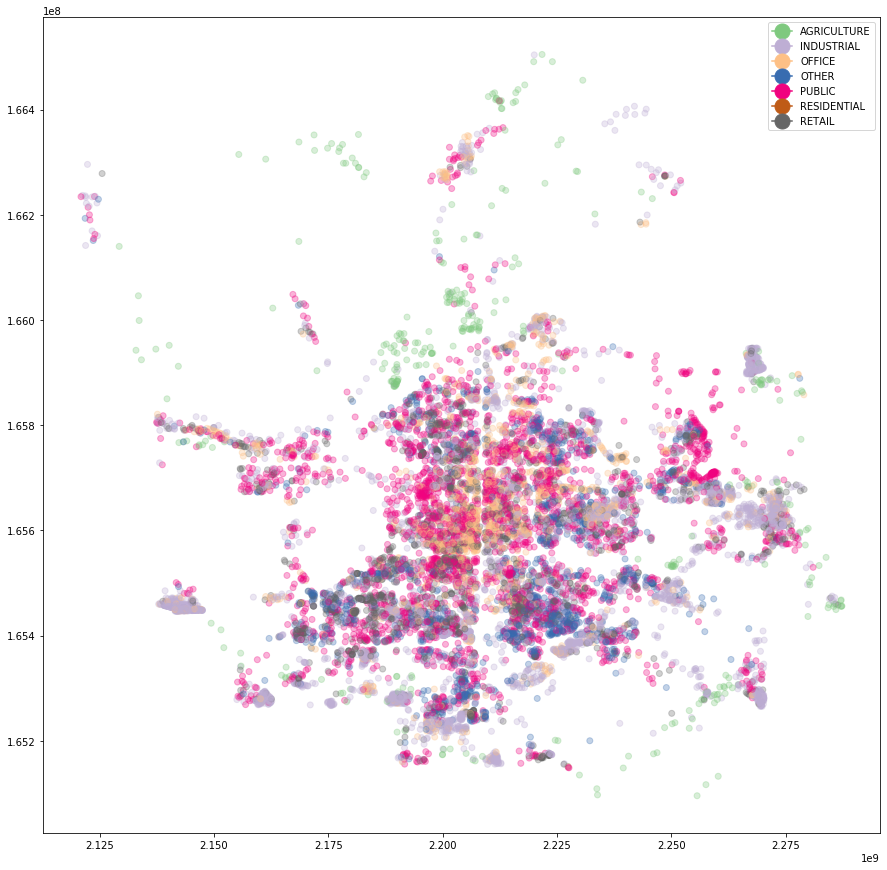

In [155]:
import matplotlib
cmap = matplotlib.cm.get_cmap(name='Accent',lut=7)
plt.figure(figsize=(15,15))

scatter_y = LabelEncoder().fit_transform(df.CLASE)
scatter_msk = scatter_y != 5

plt.scatter(df.X[scatter_msk],df.Y[scatter_msk],c=cmap(scatter_y[scatter_msk]),alpha=0.3)

legend_elements = [Line2D([0], [0], marker='o', color=c, label=l,
                          markerfacecolor=c, markersize=15) for c,l in zip(cmap(np.arange(7)),le.inverse_transform(range(7)))]

plt.legend(handles=legend_elements, loc='best')

In [153]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

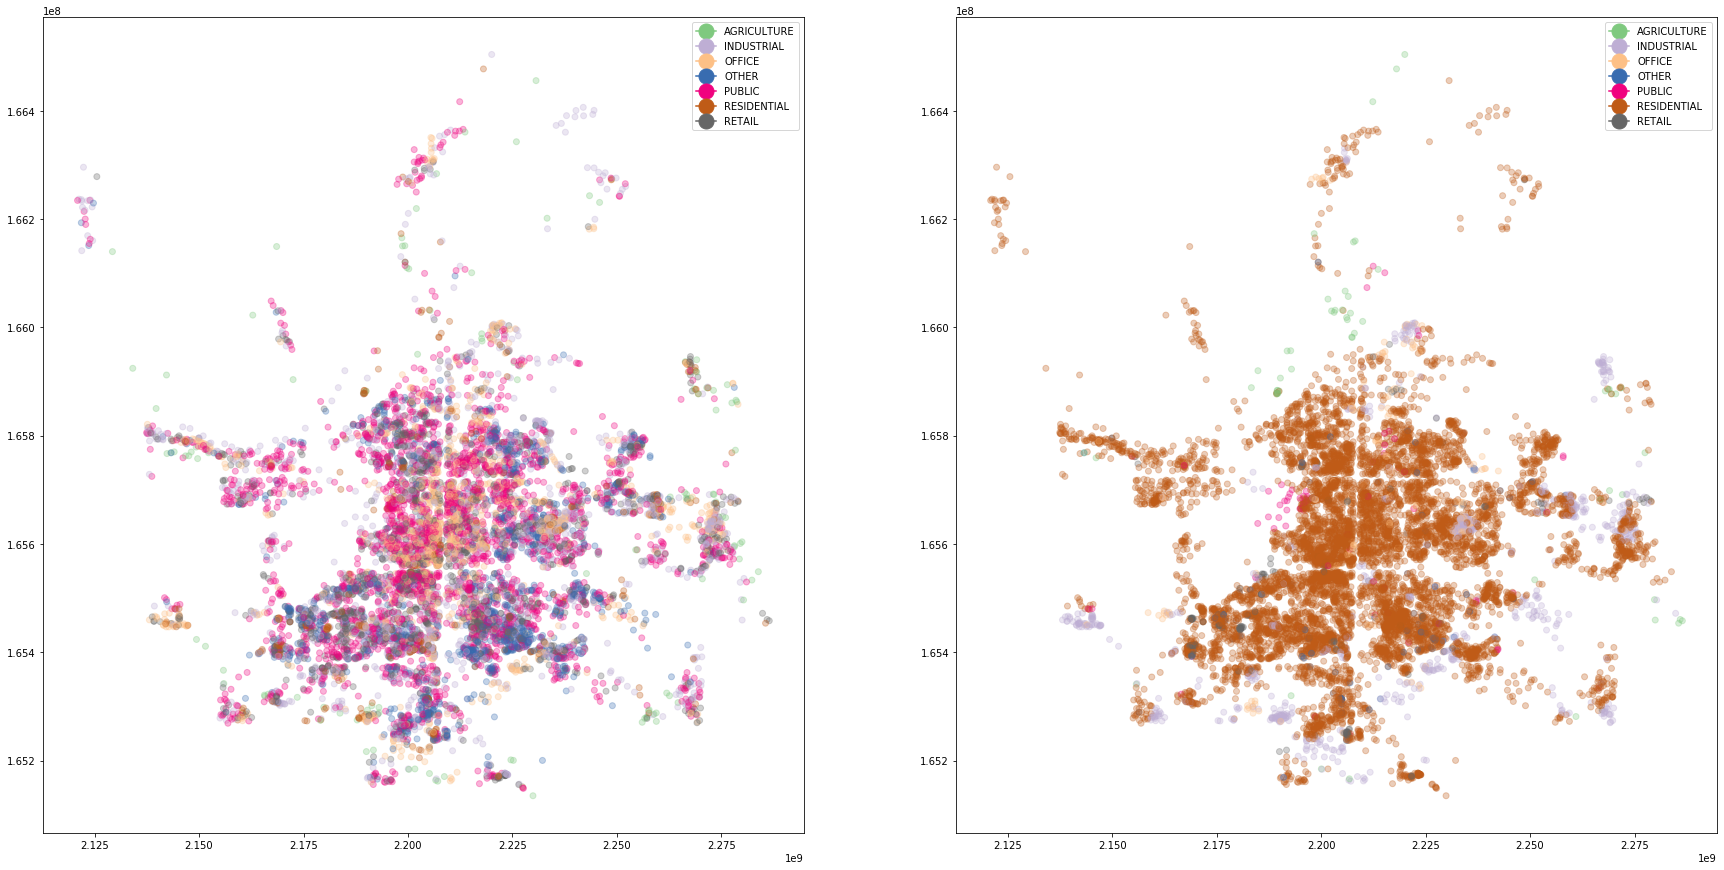

In [143]:
fig,axs = plt.subplots(1,2,figsize=(30,15))
rmsk = (yp != y)
# rmsk = np.ones_like(y,dtype=np.bool)
cmap = matplotlib.cm.get_cmap(name='Accent',lut=7)

plt_msk = np.zeros(df.shape[0],dtype=np.bool)
plt_msk[np.where(~(df.isna().any(1)))[0][rmsk]] = True
axs[0].scatter(df.X[plt_msk],df.Y[plt_msk],c=cmap(y[rmsk]),alpha=0.3)
axs[1].scatter(df.X[plt_msk],df.Y[plt_msk],c=cmap(yp[rmsk]),alpha=0.3)

legend_elements = [Line2D([0], [0], marker='o', color=c, label=l,
                          markerfacecolor=c, markersize=15) for c,l in zip(cmap(np.arange(7)),le.inverse_transform(range(7)))]

# Create the figure
# fig, ax = plt.subplots()
axs[0].legend(handles=legend_elements, loc='best')
axs[1].legend(handles=legend_elements, loc='best')

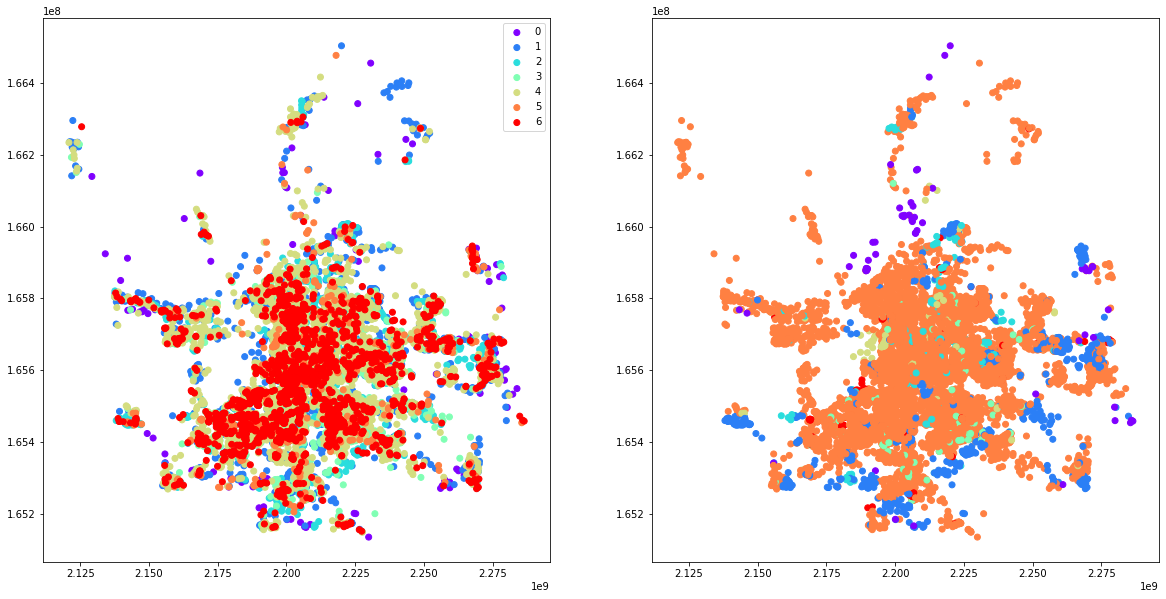

In [128]:

fig,axs = plt.subplots(1,2,figsize=(20,10))
rmsk = (yp != y)
cmap = matplotlib.cm.get_cmap(name='rainbow',lut=7)
for i in range(7):
    imsk = rmsk & (y==i)
    plt_msk = np.zeros(df.shape[0],dtype=np.bool)
    plt_msk[np.where(~(df.isna().any(1)))[0][imsk]] = True
    axs[0].scatter(df.X[plt_msk],df.Y[plt_msk],c=cmap(y[imsk]),alpha=1)
    axs[1].scatter(df.X[plt_msk],df.Y[plt_msk],c=cmap(yp[imsk]),alpha=1)
axs[0].legend(np.arange(7))
    # plt.scatter(df_ts.X,df_ts.Y,c="red",alpha=0.2)

In [124]:
import matplotlib


(array([[0.16666667, 0.5       , 0.96592583, 1.        ],
        [0.16666667, 0.8660254 , 0.8660254 , 1.        ],
        [0.5       , 1.        , 0.70710678, 1.        ]]),
 array([[0.16666667, 0.8660254 , 0.8660254 , 1.        ]]))

In [45]:
le.inverse_transform(range(7))

array(['AGRICULTURE', 'INDUSTRIAL', 'OFFICE', 'OTHER', 'PUBLIC',
       'RESIDENTIAL', 'RETAIL'], dtype=object)

In [43]:
# confusion_matrix(y,yp)
from sklearn.metrics import plot_confusion_matrix, precision_recall_fscore_support, f1_score

# f1_score(y, yp, average='macro')
yp2 = np.zeros(y.shape)+5
yp2 = yp
precision_recall_fscore_support(y,yp2),\
f1_score(y, yp2, average='macro')

((array([0.7       , 0.71179775, 0.34387352, 0.56121212, 0.44624091,
         0.92858112, 0.51583113]),
  array([0.58513932, 0.56486848, 0.14277899, 0.3475976 , 0.18548387,
         0.98653699, 0.18690249]),
  array([0.63743676, 0.6298782 , 0.20177812, 0.42929995, 0.26204605,
         0.95668212, 0.27438596]),
  array([  323,  4486,  1828,  1332,  2976, 90173,  2092])),
 0.4845010239005072)

In [44]:
confusion_matrix(y,yp)

array([[  189,    31,     2,     3,     7,    86,     5],
       [   30,  2534,   171,    53,   103,  1520,    75],
       [    2,   271,   261,    32,    62,  1162,    38],
       [    3,    75,    29,   463,   110,   622,    30],
       [   14,   130,    66,   112,   552,  2047,    55],
       [   27,   390,   171,   130,   332, 88959,   164],
       [    5,   129,    59,    32,    71,  1405,   391]])

In [118]:
# from sklearn.svm import SVC
# svc = SVC()
le = LabelEncoder()
# df.CLASE = le.fit_transform(df.CLASE)
msk = ~(df.isna().any(1))
mini_df = df.drop(columns=['CLASE']).select_dtypes(['int','float']).loc[msk]
X = StandardScaler().fit_transform(mini_df.values)
X, y = X,le.fit_transform(df.loc[msk,'CLASE'].values)

# svc.fit(X[tr_idx],y[tr_idx])

# yp = cross_val_predict(svc,X,y,n_jobs=-1)

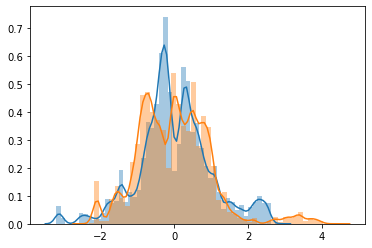

In [72]:
from sklearn.preprocessing import StandardScaler
sns.distplot(StandardScaler().fit_transform(df.X.values.reshape((-1,1))))
sns.distplot(StandardScaler().fit_transform(df.Y.values.reshape((-1,1))))

In [38]:
df2 = pd.DataFrame([[0,0,0],[1,0,0],[2,1,1]])
df2.set_index(0).duplicated()

0
0    False
1     True
2    False
dtype: bool

In [45]:
efun(np.eye(N))

ValueError: cannot reshape array of size 530 into shape (53,53)

In [104]:
from xgboost import XGBClassifier

In [108]:
from imblearn.under_sampling import EditedNearestNeighbours
enn = EditedNearestNeighbours('majority',n_neighbors=3,n_jobs=-1)
Xrs = enn.fit_resample(X,y)

rmsk = np.zeros_like(y,dtype=np.bool)
rmsk[enn.sample_indices_] = True
# yp = knn.fit_predict(X,y,rmsk=rmsk)

# f1_score(y,yp,average='macro'),accuracy_score(y,yp)

In [120]:
le.inverse_transform(range(7))

array(['AGRICULTURE', 'INDUSTRIAL', 'OFFICE', 'OTHER', 'PUBLIC',
       'RESIDENTIAL', 'RETAIL'], dtype=object)

In [113]:
confusion_matrix(y[ts_idx],yp)

array([[  23,    5,    0,    0,    1,    3,    0],
       [   2,  319,   12,    7,   10,   90,    9],
       [   0,   33,   35,    1,   18,   92,    4],
       [   1,    9,    8,   70,   14,   30,    1],
       [   0,    8,   10,   15,  103,  157,    5],
       [   5,   55,   25,   28,  100, 8796,    8],
       [   0,   18,    9,    1,    9,  134,   38]])

In [156]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict, StratifiedShuffleSplit
xg = XGBClassifier()
tr_idx,ts_idx = list(StratifiedShuffleSplit().split(X,y))[0]
xgmsk = np.zeros_like(y,dtype=np.bool)
xg_ts_msk = np.zeros_like(y,dtype=np.bool)
xgmsk[tr_idx] = True
xg_ts_msk[ts_idx] = True
# rmsk = y != 5
rmsk = np.ones_like(y,dtype=np.bool)
xgmsk &= rmsk
xg_ts_msk &= rmsk
xg.fit(X[xgmsk],y[xgmsk])
# yp = cross_val_predict(xg,X,y)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

In [167]:
from sklearn.multiclass import OneVsOneClassifier
ovo = OneVsOneClassifier(xg)
ovo.fit(X[tr_idx],y[tr_idx])

XGBoostError: value 0 for Parameter num_class should be greater equal to 1
num_class: Number of output class in the multi-class classification.

In [135]:
xg_ts_msk.sum(),ts_idx.size

(1304, 10321)

In [158]:
yp = xg.predict(X[xg_ts_msk])
# f1_score(y[ts_idx],yp,average='macro'),accuracy_score(y[ts_idx],yp)

In [140]:
accuracy_score(y[xg_ts_msk],yp)

0.6042944785276073

In [164]:
le.inverse_transform(range(7))

array(['AGRICULTURE', 'INDUSTRIAL', 'OFFICE', 'OTHER', 'PUBLIC',
       'RESIDENTIAL', 'RETAIL'], dtype=object)

In [163]:
cm = confusion_matrix(y[xg_ts_msk],yp)
np.delete(np.delete(cm,5,axis=0),5,axis=1)

array([[ 19,   1,   0,   0,   0,   1],
       [  2, 278,  14,   9,   8,  10],
       [  0,  30,  33,   2,   6,   2],
       [  1,   5,   3,  55,   9,   0],
       [  1,  11,   2,  14,  68,   2],
       [  1,  16,   8,   1,   7,  32]])

In [139]:
confusion_matrix(y[xg_ts_msk],yp)

array([[ 24,   6,   0,   0,   1,   1],
       [  2, 350,  32,  13,  26,  26],
       [  1,  47,  69,   4,  41,  21],
       [  0,  18,   2,  72,  35,   6],
       [  1,  31,  31,  21, 187,  27],
       [  1,  43,  26,   4,  49,  86]])

In [114]:
le.inverse_transform(range(7))

array([0, 1, 2, 3, 4, 5, 6])

In [90]:
f1_score(y,yp,average='macro'),accuracy_score(y,yp)

(0.4883037687011519, 0.9062881503730259)

In [76]:
f1_score(y,yp,average='macro'),accuracy_score(y,yp)

(0.4644331194895785, 0.9075380292607306)

In [44]:
X.shape,y.shape

((103210, 53), (103210,))

In [43]:
yp = knn.fit_predict(X,y)
f1_score(y,yp,average='macro')

0.4644331194895785

In [31]:
from sklearn.metrics import accuracy_score,f1_score

In [46]:
from scipy.optimize import differential_evolution
N1 = N2 = X.shape[1]
knn = MaskKNNEval(15,n_jobs=-1, p=1)
def efun(x):
    Xt = np.dot(X,x.reshape((N1,N2)))
    yp = knn.fit_predict(Xt,y)
    return f1_score(y,yp,average='macro')

def cb(*args):
    print(args)
    
# de = differential_evolution(efun,bounds=[(-1,1) for i in range(N**2)],maxiter=5,callback=cb)

In [128]:
xydf = df[['X','Y']]
r = xydf[xydf.duplicated()]
r

,X,Y
ID,,
C8B1BD0F1DA46352,2195539614,165888187
